In [84]:
import pandas as pd
import numpy as np

import dash
import dash_core_components as dcc
import dash_html_components as html

import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('df5_log2_ratio.csv', index_col = ['locus_tag'])

In [3]:
df.head()

,FM18_CH3OH_4.1/day,FM18_CH3OH_4.1/day_R1,FM20_no-lim_5.2/day,FM20_no-lim_5.2/day_R1,FM21_no-lim_5.4/day,FM21_no-lim_5.4/day_R1,FM21_no-lim_5.4/day_R2,FM12_CH4-lim_3.0/day,FM12_CH4-lim_3.0/day_R1,FM14_CH4-lim_3.0/day,...,FM34_+Cu_2.7/day_t480m,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_100001,0.192390,0.399056,0.226044,0.031919,-0.259212,0.024218,-0.375939,-0.662138,-0.664962,-0.340741,...,-0.169520,-0.714689,0.375098,0.230305,0.045003,-0.026448,-0.136418,-0.239295,-0.400820,-0.313184
MBURv2_100002,-0.405649,-0.309960,-0.581343,-1.050033,-1.235838,-0.529028,-1.161497,-1.274654,-1.243865,-1.715639,...,-2.717254,-2.980653,-0.202880,-2.423929,-0.404706,-1.477967,-1.135770,-1.251409,-1.323482,-1.384361
MBURv2_10001,-0.349818,-0.432159,-0.748817,-1.126519,-1.176547,-0.974533,-1.157318,-1.812235,-1.774428,-1.724550,...,-2.819275,-2.497711,-1.428475,-1.240548,-1.345572,-1.410063,-2.228331,-1.943554,-2.684422,-2.403920
MBURv2_10002,-0.429268,0.644220,0.573052,0.232233,-0.060841,0.395560,-0.097191,-1.325059,-1.769956,-0.577714,...,0.187883,-0.253695,0.061458,-0.387287,0.545962,0.114193,-0.076866,-0.000965,-0.226299,-0.229278
MBURv2_10003,-0.475120,-0.160000,-0.398919,-0.153891,-0.364631,-0.543518,-0.403339,-1.106884,-1.116421,-0.932348,...,-0.737528,-1.391160,-0.835128,-1.039627,-0.662973,-0.845406,-1.228497,-1.149969,-1.464724,-1.412012


### Cluster id

In [31]:
def kmeans_cluster(gene):
    """

    """
    X = df

    kmeans = KMeans(n_clusters= 19 , max_iter=300, random_state=4) 
    kmeans.fit(X)
    
    labels_kmeans = kmeans.labels_
    df_clusterid = pd.DataFrame(labels_kmeans, index = df.index)
    df_clusterid.rename(columns = {0:"cluster"}, inplace = True)
    df_clusters = pd.concat([df, df_clusterid], axis = 1)
    
    genes_clusterid = df_clusterid.loc[gene]
    
    return genes_clusterid 

In [32]:
kmeans_cluster('MBURv2_10007')

cluster    3
Name: MBURv2_10007, dtype: int32

### Cluster Overview

In [101]:
def cluster_size(k):
    """

    """
    X = df

    kmeans = KMeans(n_clusters= k , max_iter=300, random_state=4) 
    kmeans.fit(X)
    
    labels_kmeans = kmeans.labels_
    df_clusterid = pd.DataFrame(labels_kmeans, index = df.index)
    df_clusterid.rename(columns = {0:"cluster"}, inplace = True)
    df_clusters = pd.concat([df, df_clusterid], axis = 1)
    
    #genes_clusterid = df_clusterid.loc[gene]
    
    count = df_clusters.groupby('cluster').count().iloc[:,0]
    
    fig = plt.figure(figsize=(15, 10))

    x_axis = list(count.index)
    y = count.values

    plt.bar(x_axis, y)

    plt.xticks(list(range(k)),fontsize=14)
    plt.xlabel('cluster id',fontsize=20)
    plt.ylabel('number od genes in each cluster',fontsize=20)
    plt.title('Cluster Size Overview',fontsize=24)
   
    return  plt.show()

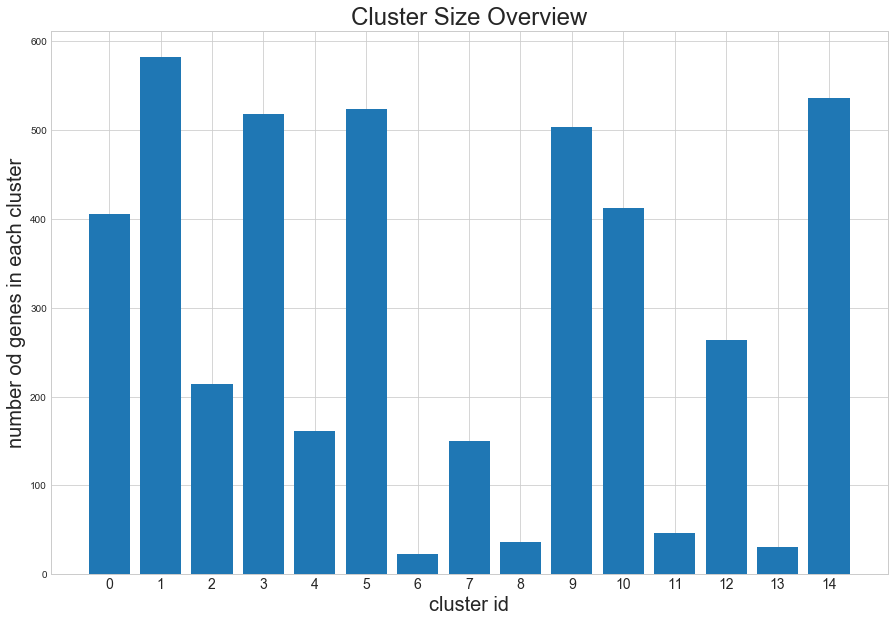

In [102]:
cluster_size(15)

In [50]:
X = df

kmeans = KMeans(n_clusters= 15 , max_iter=300, random_state=4) 
kmeans.fit(X)
labels_kmeans = kmeans.labels_
df_clusterid = pd.DataFrame(labels_kmeans, index = df.index)
df_clusterid.rename(columns = {0:"cluster"}, inplace = True)
df_clusters = pd.concat([df, df_clusterid], axis = 1)

In [55]:
count = df_clusters.groupby('cluster').count().iloc[:,0]

In [77]:
count.values

array([406, 583, 214, 518, 161, 524,  23, 150,  36, 504, 413,  47, 264,
        31, 536])

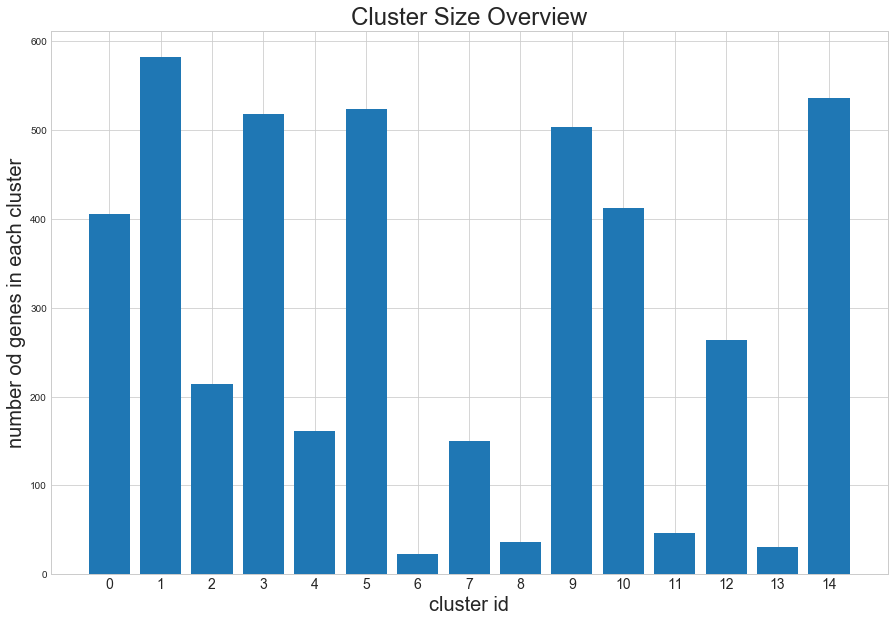

In [98]:
fig = plt.figure(figsize=(15, 10))

x_axis = list(count.index)
y = count.values

plt.bar(x_axis, y)

plt.xticks(list(range(15)),fontsize=14)
plt.xlabel('cluster id',fontsize=20)
plt.ylabel('number od genes in each cluster',fontsize=20)
plt.title('Cluster Size Overview',fontsize=24)

plt.show()